# BBM 469 : Data Intensive Applications Lab.
## Data Science Capstone Project
### subject
### Uğurcan ERDOĞAN - Alperen Berk IŞILDAR

### PROBLEM DEFINITION :


In this project, we will examine the correct use of cross validation and random sampling techniques.

Actually, we have to follow the steps below in order:

- Data Collection
- Data Preprocessing and Cleaning
- Data Exploration
- Feature Engineering
- Predictive Modelling
- Data Visualization

But since our aim is to show the correct usage of these techniques, we will only focus on the **data visualization**, **feature engineering** and **predictive modeling** steps in our blog post.

In [1422]:
apikey = 'hogz7OSaxUmgkrDDpCAYnbSfujwXdOanXhqDcTjj5H4uaU3Ik8Nf89rjFXRB5h5Q'
secret = '6LN48p3vTAI0631S7WUpDrzWoOnDHlMMAaKvar7LA3gqn4zb4x0nB2Hce6uyaCwb'

In [1423]:
!pip install python-binance pandas mplfinance openpyxl

In [1424]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [1425]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

1- Data Collection
In this step, we will choose an existing imbalanced dataset.

In [1426]:
client = Client(apikey, secret)
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '11 Jan 2020')
historical

#  Data content:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

[[1578700800000,
  '8198.86000000',
  '8286.34000000',
  '8003.16000000',
  '8020.01000000',
  '54810.03266700',
  1578787199999,
  '445034349.56470204',
  469131,
  '27916.12497400',
  '226716001.44288607',
  '0'],
 [1578787200000,
  '8020.01000000',
  '8197.00000000',
  '7960.00000000',
  '8184.98000000',
  '38131.49433600',
  1578873599999,
  '309351920.45885002',
  350662,
  '19718.54109600',
  '159972663.99291870',
  '0'],
 [1578873600000,
  '8184.97000000',
  '8196.00000000',
  '8055.89000000',
  '8110.34000000',
  '31159.75568300',
  1578959999999,
  '252656965.35815013',
  289144,
  '15215.22650100',
  '123407351.91807934',
  '0'],
 [1578960000000,
  '8110.34000000',
  '8880.00000000',
  '8105.54000000',
  '8810.01000000',
  '120399.12674200',
  1579046399999,
  '1032735180.86587384',
  915328,
  '62492.09667600',
  '536081638.05418570',
  '0'],
 [1579046400000,
  '8814.64000000',
  '8916.48000000',
  '8564.00000000',
  '8821.41000000',
  '84816.29760600',
  1579132799999,
  '7

In [1427]:
hist_df = pd.DataFrame(historical)

In [1428]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1578700800000,8198.86000000,8286.34000000,8003.16000000,8020.01000000,54810.03266700,1578787199999,445034349.56470204,469131,27916.12497400,226716001.44288607,0
1,1578787200000,8020.01000000,8197.00000000,7960.00000000,8184.98000000,38131.49433600,1578873599999,309351920.45885002,350662,19718.54109600,159972663.99291870,0
2,1578873600000,8184.97000000,8196.00000000,8055.89000000,8110.34000000,31159.75568300,1578959999999,252656965.35815013,289144,15215.22650100,123407351.91807934,0
3,1578960000000,8110.34000000,8880.00000000,8105.54000000,8810.01000000,120399.12674200,1579046399999,1032735180.86587384,915328,62492.09667600,536081638.05418570,0
4,1579046400000,8814.64000000,8916.48000000,8564.00000000,8821.41000000,84816.29760600,1579132799999,743712237.27908164,764048,42493.55102600,372770745.17929917,0


In [1429]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume',
                   'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [1430]:
hist_df.shape

(848, 12)

In [1431]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [1432]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time'] / 1000, unit='s').dt.normalize()
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time'] / 1000, unit='s').dt.normalize()

In [1433]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [1434]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [1435]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2020-01-11,8198.86,8286.34,8003.16,8020.01,54810.032667,2020-01-11,4.450343e+08,469131,27916.124974,2.267160e+08,0
1,2020-01-12,8020.01,8197.00,7960.00,8184.98,38131.494336,2020-01-12,3.093519e+08,350662,19718.541096,1.599727e+08,0
2,2020-01-13,8184.97,8196.00,8055.89,8110.34,31159.755683,2020-01-13,2.526570e+08,289144,15215.226501,1.234074e+08,0
3,2020-01-14,8110.34,8880.00,8105.54,8810.01,120399.126742,2020-01-14,1.032735e+09,915328,62492.096676,5.360816e+08,0
4,2020-01-15,8814.64,8916.48,8564.00,8821.41,84816.297606,2020-01-15,7.437122e+08,764048,42493.551026,3.727707e+08,0


In [1436]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [1437]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,848.000000,848.000000,848.000000,848.000000,848.000000,8.480000e+02,8.480000e+02,848.000000,8.480000e+02
mean,31229.946616,32113.951439,30231.745920,31262.004068,66439.538629,1.966577e+09,1.324592e+06,32550.942052,9.672688e+08
std,18615.986039,19125.260442,18012.635889,18599.750309,37984.348176,1.526462e+09,7.127952e+05,18475.080527,7.489790e+08
min,4800.010000,5365.420000,3782.130000,4800.000000,15805.447180,2.066281e+08,2.831180e+05,7642.382430,9.992165e+07
25%,10508.770000,10677.562500,10257.707500,10538.947500,43091.700720,7.080276e+08,7.890342e+05,21097.574925,3.421278e+08
50%,35808.395000,37362.790000,34024.275000,35808.075000,56985.591552,1.630351e+09,1.176090e+06,27954.953108,8.096451e+08
75%,46761.212500,47991.490000,45500.000000,46761.212500,80101.085075,2.790368e+09,1.737128e+06,39344.027356,1.368522e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09


In [1438]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           848 non-null    datetime64[ns]
 1   Open                848 non-null    float64       
 2   High                848 non-null    float64       
 3   Low                 848 non-null    float64       
 4   Close               848 non-null    float64       
 5   Volume              848 non-null    float64       
 6   Close Time          848 non-null    datetime64[ns]
 7   Quote Asset Volume  848 non-null    float64       
 8   Number of Trades    848 non-null    int64         
 9   TB Base Volume      848 non-null    float64       
 10  TB Quote Volume     848 non-null    float64       
 11  Ignore              848 non-null    object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 79.6+ KB


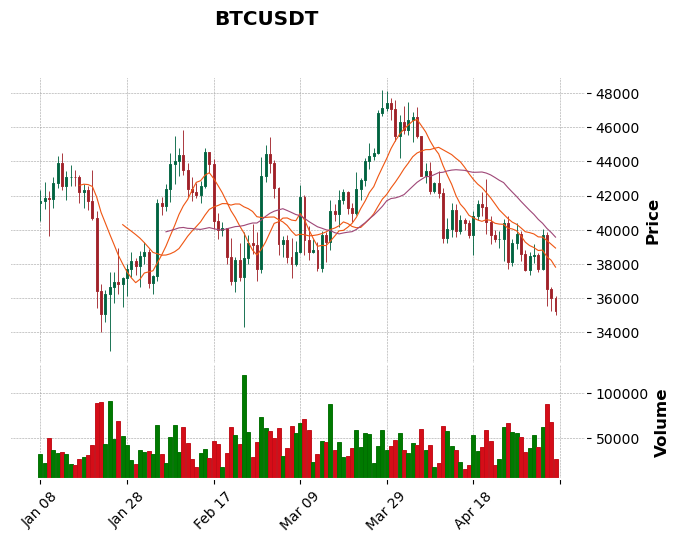

In [1439]:
import mplfinance as mpf

mpf.plot(hist_df.set_index('Close Time').tail(120),
         type='candle', style='charles',
         volume=True,
         title='BTCUSDT',
         mav=(10, 20, 30))

In [1440]:
df = hist_df.drop(["High","Low","Volume","Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Ignore"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open Time   848 non-null    datetime64[ns]
 1   Open        848 non-null    float64       
 2   Close       848 non-null    float64       
 3   Close Time  848 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 26.6 KB


In [1441]:
phase_df = pd.read_excel("phase_dates.xlsx")

phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Phase's Next Date        48 non-null     datetime64[ns]
 1   Next Phase's First Date  48 non-null     datetime64[ns]
 2   Starting Phase Name      48 non-null     object        
dtypes: datetime64[ns](2), object(1)
memory usage: 1.2+ KB


In [1442]:
full_moon_df = phase_df[phase_df["Starting Phase Name"] == "Full Moon"].reset_index(drop=True)
new_moon_df = phase_df[phase_df["Starting Phase Name"] == "New Moon"].reset_index(drop=True)

print(full_moon_df.head())

  Phase's Next Date Next Phase's First Date Starting Phase Name
0        2020-01-11              2020-01-25           Full Moon
1        2020-02-10              2020-02-23           Full Moon
2        2020-03-10              2020-03-24           Full Moon
3        2020-04-09              2020-04-23           Full Moon
4        2020-05-08              2020-05-22           Full Moon


In [1443]:
open_prices = []
close_prices = []
open_dates = []
close_dates = []

for i in range(full_moon_df.shape[0]):
    for j in range(df.shape[0]):
        if full_moon_df.iloc[i]["Phase\'s Next Date"] == df.iloc[j]["Open Time"]:
            open_price = df.iloc[j]["Open"]
            open_prices.append(open_price)
            open_dates.append(full_moon_df.iloc[i]["Phase\'s Next Date"])

for i in range(full_moon_df.shape[0]):
    for j in range(df.shape[0]):
        if full_moon_df.iloc[i]["Next Phase\'s First Date"] == df.iloc[j]["Close Time"]:
            close_price = df.iloc[j]["Close"]
            close_prices.append(close_price)
            close_dates.append(full_moon_df.iloc[i]["Next Phase\'s First Date"])

In [1444]:
expected_to_increase_df = pd.DataFrame([open_dates,close_dates,open_prices,close_prices]).transpose()
expected_to_increase_df.columns=['Open Date','Close Date','Open Price','Close Price']

expected_to_increase_df = pd.concat([expected_to_increase_df, expected_to_increase_df["Close Price"]-expected_to_increase_df["Open Price"]], axis=1, join='inner')
expected_to_increase_df.columns=['Open Date','Close Date','Open Price','Close Price', 'Price Change Amount']

expected_to_increase_df

,Open Date,Close Date,Open Price,Close Price,Price Change Amount
0,2020-01-11,2020-01-25,8198.86,8340.58,141.72
1,2020-02-10,2020-02-23,10151.72,9936.4,-215.32
2,2020-03-10,2020-03-24,7929.87,6744.72,-1185.15
3,2020-04-09,2020-04-23,7360.26,7482.39,122.13
4,2020-05-08,2020-05-22,9986.3,9170.0,-816.3
5,2020-06-06,2020-06-21,9621.17,9294.69,-326.48
6,2020-07-06,2020-07-20,9069.41,9160.78,91.37
7,2020-08-04,2020-08-19,11219.68,11754.59,534.91
8,2020-09-03,2020-09-17,11388.54,10939.99,-448.55
9,2020-10-03,2020-10-16,10570.4,11319.32,748.92


In [1445]:
is_increased = []
for i in range(expected_to_increase_df.shape[0]):
    if expected_to_increase_df.iloc[i]["Price Change Amount"] > 0:
        is_increased.append(1)
    else:
        is_increased.append(0)

In [1446]:
expected_to_increase_df = pd.concat([expected_to_increase_df, pd.DataFrame(is_increased)], axis=1, join='inner')
expected_to_increase_df.columns=['Open Date','Close Date','Open Price','Close Price', 'Price Change Amount', 'Is Increased As Expected']
expected_to_increase_df

,Open Date,Close Date,Open Price,Close Price,Price Change Amount,Is Increased As Expected
0,2020-01-11,2020-01-25,8198.86,8340.58,141.72,1
1,2020-02-10,2020-02-23,10151.72,9936.4,-215.32,0
2,2020-03-10,2020-03-24,7929.87,6744.72,-1185.15,0
3,2020-04-09,2020-04-23,7360.26,7482.39,122.13,1
4,2020-05-08,2020-05-22,9986.3,9170.0,-816.3,0
5,2020-06-06,2020-06-21,9621.17,9294.69,-326.48,0
6,2020-07-06,2020-07-20,9069.41,9160.78,91.37,1
7,2020-08-04,2020-08-19,11219.68,11754.59,534.91,1
8,2020-09-03,2020-09-17,11388.54,10939.99,-448.55,0
9,2020-10-03,2020-10-16,10570.4,11319.32,748.92,1
